In [2]:
import spotipy
import spotipy.util as util
from datetime import datetime
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import matplotlib.pyplot as plt
username = "rckprnv"
scope = "user-library-read"
#export SPOTIPY_CLIENT_ID ='3aa12f8e691c4df69ea5cf90a8d14b83'
#export SPOTIPY_CLIENT_SECRET ='380a5fc6c96e4fdcaf568425b919a00e'
#export SPOTIPY_REDIRECT_URI ='http://localhost:8888'
#client_credentials_manager = SpotifyClientCredentials(client_id='3aa12f8e691c4df69ea5cf90a8d14b83', client_secret='380a5fc6c96e4fdcaf568425b919a00e')
token = util.prompt_for_user_token(username,scope,client_id='35018e55ab1d418f85142ed667b3f069',client_secret='5150cff246404d1795f3d4c2c559e902',redirect_uri='http://localhost:8888/callback/')


#playlists = sp.user_playlists('rckprnv')
if token:
    sp = spotipy.Spotify(auth=token)
    results = sp.current_user_saved_tracks()
    for item in results['items']:
        track = item['track']
        print (track['name'] + ' - ' + track['artists'][0]['name'])
else:
    print ("Can't get token for"), username

Marigold - Periphery
Flight - Devin Townsend
Azadi - Dub Sharma
take care - EDEN
wings - EDEN
icarus - EDEN
lost//found - EDEN
gold - EDEN
forever//over - EDEN
float - EDEN
wonder - EDEN
love; not wrong (brave) - EDEN
falling in reverse - EDEN
Paranoid - Lauv
Machine Gun - Live at the Fillmore East - Jimi Hendrix
Tune Kaha - Prateek Kuhad
Gustaakh - The Local Train
Dilnawaz - The Local Train
Khudi - The Local Train
Aaftaab - The Local Train


In [3]:
df_saved_tracks = pd.DataFrame()
track_list = ''
added_ts_list = []
artist_list = []
title_list = []
added_ts_list_year = []

more_songs = True
offset_index = 0

while more_songs:
    songs = sp.current_user_saved_tracks(offset=offset_index)

    for song in songs['items']:
        #join track ids to a string for audio_features function
        track_list += song['track']['id'] +','

        #get the time when the song was added
        added_ts_list.append(datetime.strptime(song['added_at'], '%Y-%m-%dT%H:%M:%SZ'))
        added_ts_list_year.append(datetime.strptime(song['added_at'], '%Y-%m-%dT%H:%M:%SZ').year)

        #get the title of the song
        title_list.append(song['track']['name'])

        #get all the artists in the song
        artists = song['track']['artists']
        artists_name = ''
        for artist in artists:
            artists_name += artist['name']  + ','
        artist_list.append(artists_name[:-1])

    #get the track features and append into a dataframe
    track_features = sp.audio_features(track_list[:-1])
    df_temp = pd.DataFrame(track_features)
    df_saved_tracks = df_saved_tracks.append(df_temp)
    track_list = ''

    if songs['next'] == None:
        # no more songs in playlist
        more_songs = False
    else:
        # get the next n songs
        offset_index += songs['limit']

#include timestamp added, title and artists of a song
df_saved_tracks['added_at'] = added_ts_list
df_saved_tracks['song_title'] = title_list
df_saved_tracks['artists'] = artist_list
df_saved_tracks['added_at_year'] = added_ts_list_year
print(df_saved_tracks['added_at_year'])


0     2019
1     2019
2     2019
3     2019
4     2019
5     2019
6     2019
7     2019
8     2019
9     2019
10    2019
11    2019
12    2019
13    2019
14    2019
15    2019
16    2019
17    2019
18    2019
19    2019
0     2019
1     2019
2     2019
3     2019
4     2019
5     2019
6     2019
7     2019
8     2019
9     2019
      ... 
1     2015
2     2015
3     2015
4     2015
5     2015
6     2015
7     2015
8     2015
9     2015
10    2015
11    2015
12    2015
13    2015
14    2015
15    2015
16    2015
17    2015
18    2015
19    2015
0     2015
1     2015
2     2015
3     2015
4     2015
5     2015
6     2015
7     2015
8     2015
9     2015
10    2015
Name: added_at_year, Length: 531, dtype: int64


               acousticness  danceability    duration_ms    energy  \
added_at_year                                                        
2015               0.251214      0.580222  237603.044444  0.655689   
2016               0.023867      0.576100  198702.700000  0.874600   
2017               0.066403      0.510457  284482.753086  0.717642   
2018               0.188562      0.471996  281672.168142  0.671823   
2019               0.415821      0.502189  274606.266272  0.525858   

               instrumentalness       key  liveness  loudness      mode  \
added_at_year                                                             
2015                   0.050362  4.555556  0.209673 -5.714289  0.577778   
2016                   0.001305  4.800000  0.328500 -4.221500  0.500000   
2017                   0.181128  5.061728  0.193612 -6.874444  0.481481   
2018                   0.183656  5.154867  0.187066 -7.646668  0.579646   
2019                   0.130502  4.970414  0.182622 -9.1316

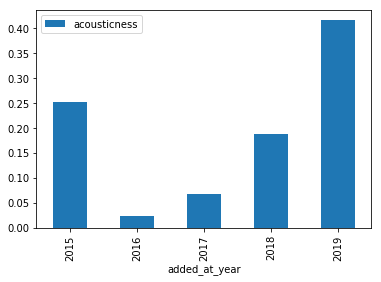

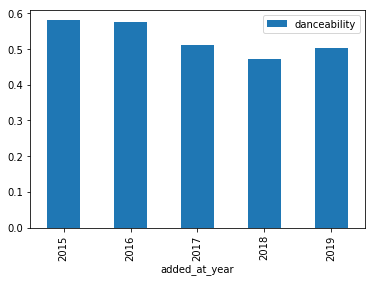

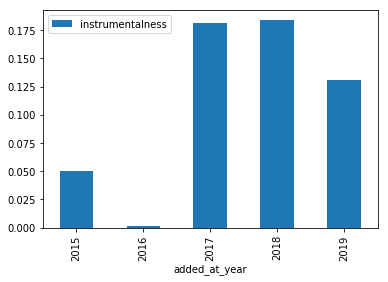

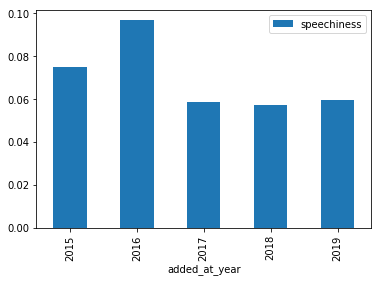

In [18]:
df_mean =  df_saved_tracks.groupby(['added_at_year']).mean()
print(df_mean)

df_mean.plot(kind = 'bar',y='acousticness')
plt.show()

df_mean.plot(kind = 'bar',y='danceability')
plt.show()

df_mean.plot(kind = 'bar',y='instrumentalness')
plt.show()

df_mean.plot(kind = 'bar',y='speechiness')
plt.show()



#df_mean_frame = pd.DataFrame({'added_at_year' : df_saved_tracks['added_at_year'], 'acousticness': df_mean['acousticness']})
#print(df_mean_frame)
# = pd.DataFrame(df_saved_tracks.groupby(['added_at_year']).mean())
#plt.plot(df_mean_frame['added_at_year'],df_mean_frame['acouticness'] )

